In [1]:
import pandas as pd 
import numpy as np 
from pandas import HDFStore,read_hdf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,roc_auc_score
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## read final data
train = read_hdf('/content/drive/My Drive/Colab Notebooks/Facebook/HDF_files/final_stage.h5','train_df',mode='r')
test = read_hdf('/content/drive/My Drive/Colab Notebooks/Facebook/HDF_files/final_stage.h5','test_df',mode='r')

In [0]:
print(train.columns)
print('='*80)
print(test.columns)

Index(['source_node', 'destination_node', 'indicator_link', 'jaccard_followee',
       'jaccard_followers', 'cosine_followee', 'cosine_followers',
       'num_followers_s', 'num_followers_d', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'autho_s',
       'autho_d', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3',
       'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1',
       'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',
       'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5',
       'svd_v_d_6', 'pre_followee', 'pre_follower', 'svd_dot'],
      dtype='object')
Index(['source_node', 'destination_node', 'indicator_

In [0]:
y_train = train.indicator_link
y_test = test.indicator_link

In [0]:
print(len(train),len(y_train))
print(len(test),len(y_test))

100001 100001
50001 50001


In [0]:
train.drop(['source_node','destination_node','indicator_link'],axis=1,inplace=True)
test.drop(['source_node','destination_node','indicator_link'],axis=1,inplace=True)

In [0]:
print(train.columns)
print('='*80)
print(test.columns)

Index(['jaccard_followee', 'jaccard_followers', 'cosine_followee',
       'cosine_followers', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'autho_s', 'autho_d', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'svd_u_s_1',
       'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6',
       'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5',
       'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4',
       'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3',
       'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6', 'pre_followee', 'pre_follower',
       'svd_dot'],
      dtype='object')
Index(['jaccard_followee', 'jaccard_followers', 'cosine_followee',
       'cosine_followers', 'num_followe

## Hyperparameter tuning with XGboost

In [0]:
clf = XGBClassifier(tree_method='gpu_hist',predictor='gpu_predictor')
max_depth = [1,2,3,4,5]
n_estimator = [70,80,90,100,120,150,180,200]
parameter= {'max_depth':max_depth,'n_estimator':n_estimator}
k_fold = 5

In [12]:
clf_set1 = RandomizedSearchCV(clf,param_distributions=parameter,cv=k_fold,scoring='f1',return_train_score=True)
clf_set1.fit(train,y_train) 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           predictor='gpu_predictor',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
             

## train and test score

In [13]:
print(f'Mean Train Score :',clf_set1.cv_results_['mean_train_score'])
print(f'Mean Test Score :',clf_set1.cv_results_['mean_test_score'])

Mean Train Score : [0.96236969 0.96236969 0.96944857 0.93789385 0.96236969 0.93789385
 0.97257737 0.96944857 0.96236969 0.97257737]
Mean Test Score : [0.9615754  0.9615754  0.96873961 0.93733404 0.9615754  0.93733404
 0.97118621 0.96873961 0.9615754  0.97118621]


In [14]:
print(clf_set1.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimator=80,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', predictor='gpu_predictor',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, tree_method='gpu_hist',
              verbosity=1)


### Best parameter of XGboost

In [0]:
best_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', predictor='gpu_predictor',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, tree_method='gpu_hist',
              verbosity=1)

best_clf.fit(train,y_train)

train_pred = best_clf.predict(train)
test_pred = best_clf.predict(test)

In [16]:
print(f'F1 score of Train: {f1_score(y_train,train_pred)}')
print(f'F1 score of Test: {f1_score(y_test,test_pred)}')

F1 score of Train: 0.9717324095427035
F1 score of Test: 0.9301778132750431


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True,  fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


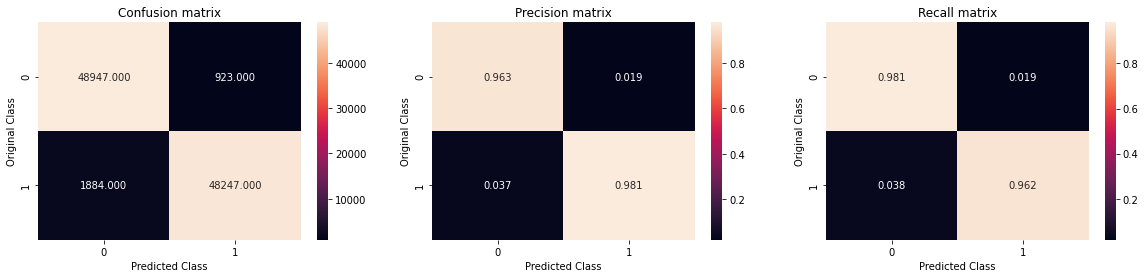

Test confusion_matrix


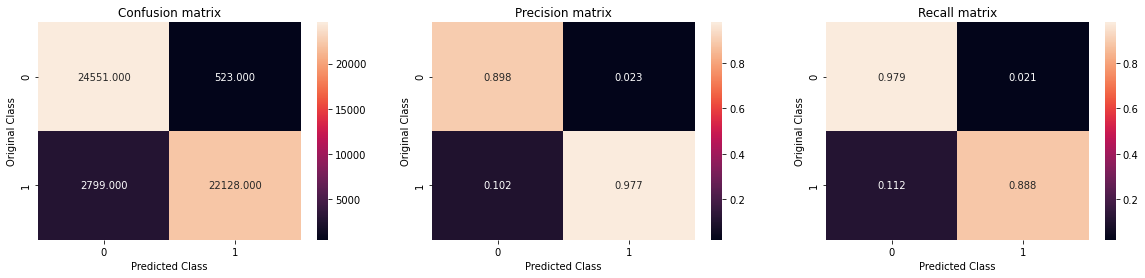

In [20]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,test_pred)

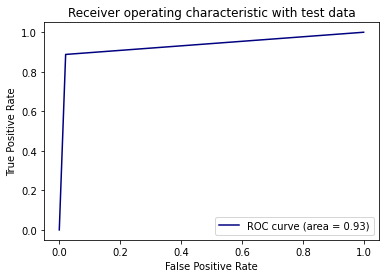

In [21]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

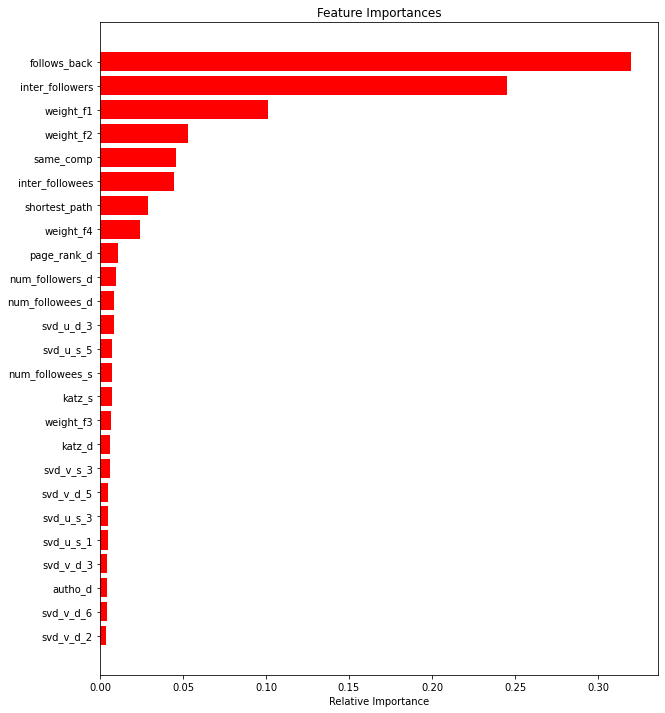

In [22]:
features = train.columns
importances = best_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusion:
1. Here We used XGboost classifier for friend recommendation. we peformed hyperparameter tuning and found the best hyperparameter.

2. With Xgboost we got 93% F1 score which is pretty good.

3. we list down top 25 feature which help us to classify that should we recommend the friend or not?. In those top 25 feature most important feature are Follow back and then inter followee/followers,same community,weight f1,weight f2.

4. The feature we build in this which is SVD DOT and Preferntial Attachment
certanily they were not that useful for recommending friend.
---

1. Follow back - It make sense why it is the most important feature because if you 
see we will follow back only those person which we have seen or in contact with means followee is following back to a follower that mean there is connection/relation between them.

2. Inter followee/followers - If you see between two node if there are lot of common nodes/person or we can say mutuals so they high probability of knowing each other. Finding the mutual friends/nodes between two node makes sense. 
